In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file = '../data/train.csv'
df = pd.read_csv(file)
print(df.head(2))

  Patient Id  Patient Age Genes in mother's side Inherited from father  \
0  PID0x6418          2.0                    Yes                    No   
1  PID0x25d5          4.0                    Yes                   Yes   

  Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name  \
0           Yes            No                4.760603            Richard   
1            No            No                4.910669               Mike   

  Family Name Father's name  ...  Birth defects  \
0         NaN         Larre  ...            NaN   
1         NaN        Brycen  ...       Multiple   

   White Blood cell count (thousand per microliter) Blood test result  \
0                                          9.857562               NaN   
1                                          5.522560            normal   

  Symptom 1 Symptom 2 Symptom 3 Symptom 4  Symptom 5  \
0       1.0       1.0       1.0       1.0        1.0   
1       1.0       NaN       1.0       1.0        0.0   

     

In [4]:
print(df.shape)

(22083, 45)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

In [6]:
df.columns

Index(['Patient Id', 'Patient Age', 'Genes in mother's side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Father's name', 'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'S

In [7]:
df.drop(columns=["Patient Id","Patient First Name","Family Name","Father's name","Institute Name","Location of Institute", 'Test 1',
       'Test 2', 'Test 3', 'Test 4', 'Test 5','Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5'], inplace=True, axis=1)

In [8]:
df.columns

Index(['Patient Age', 'Genes in mother's side', 'Inherited from father',
       'Maternal gene', 'Paternal gene', 'Blood cell count (mcL)',
       'Mother's age', 'Father's age', 'Status',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min',
       'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Genetic Disorder', 'Disorder Subclass'],
      dtype='object')

In [9]:
# Checking Unique values for each column to find out if there are other values which represent nan. 
#e.g values like - will be replaced with nan for data uniformity

for col in df:
    print(col,":", df[col].unique())

Patient Age : [ 2.  4.  6. 12. 11. 14.  3.  7.  1.  0. nan 10.  5. 13.  8.  9.]
Genes in mother's side : ['Yes' 'No']
Inherited from father : ['No' 'Yes' nan]
Maternal gene : ['Yes' 'No' nan]
Paternal gene : ['No' 'Yes']
Blood cell count (mcL) : [4.76060309 4.91066906 4.89329743 ... 5.1864702  4.85854267 4.73806671]
Mother's age : [nan 41. 21. 32. 40. 45. 44. 50. 28. 30. 24. 36. 51. 23. 49. 46. 18. 38.
 37. 42. 48. 25. 19. 47. 34. 35. 22. 33. 20. 26. 31. 29. 27. 43. 39.]
Father's age : [nan 23. 22. 63. 44. 42. 56. 20. 24. 57. 48. 30. 55. 62. 43. 32. 41. 52.
 28. 31. 61. 35. 49. 50. 29. 64. 39. 34. 51. 25. 60. 53. 58. 26. 27. 59.
 47. 38. 54. 21. 37. 36. 33. 46. 40. 45.]
Status : ['Alive' 'Deceased']
Respiratory Rate (breaths/min) : ['Normal (30-60)' 'Tachypnea' nan]
Heart Rate (rates/min : ['Normal' 'Tachycardia' nan]
Parental consent : ['Yes' nan]
Follow-up : ['High' 'Low' nan]
Gender : [nan 'Male' 'Female' 'Ambiguous']
Birth asphyxia : [nan 'No' 'No record' 'Not available' 'Yes']
Aut

In [10]:
df['Autopsy shows birth defect (if applicable)'].value_counts()

Not applicable    11083
Yes                3383
None               3366
No                 3225
Name: Autopsy shows birth defect (if applicable), dtype: int64

In [11]:
#df.isna().sum()
df['Birth asphyxia'] = df['Birth asphyxia'].replace("Not available", np.NaN)
df['Birth asphyxia'] = df['Birth asphyxia'].replace("No record", np.NaN)
df['Autopsy shows birth defect (if applicable)'] = df['Autopsy shows birth defect (if applicable)'].replace("Not applicable", np.NaN)

#check with dipanjan on this 
df['Autopsy shows birth defect (if applicable)'] = df['Autopsy shows birth defect (if applicable)'].replace("None", 'No')

df['H/O radiation exposure (x-ray)'] = df['H/O radiation exposure (x-ray)'].replace("Not applicable", np.NaN)
df['H/O radiation exposure (x-ray)'] = df['H/O radiation exposure (x-ray)'].replace("-", np.NaN)
df['H/O substance abuse'] = df['H/O substance abuse'].replace("Not applicable", np.NaN)
df['H/O substance abuse'] = df['H/O substance abuse'].replace("-", np.NaN)

In [12]:
for col in df:
    print(col,":", df[col].unique())

Patient Age : [ 2.  4.  6. 12. 11. 14.  3.  7.  1.  0. nan 10.  5. 13.  8.  9.]
Genes in mother's side : ['Yes' 'No']
Inherited from father : ['No' 'Yes' nan]
Maternal gene : ['Yes' 'No' nan]
Paternal gene : ['No' 'Yes']
Blood cell count (mcL) : [4.76060309 4.91066906 4.89329743 ... 5.1864702  4.85854267 4.73806671]
Mother's age : [nan 41. 21. 32. 40. 45. 44. 50. 28. 30. 24. 36. 51. 23. 49. 46. 18. 38.
 37. 42. 48. 25. 19. 47. 34. 35. 22. 33. 20. 26. 31. 29. 27. 43. 39.]
Father's age : [nan 23. 22. 63. 44. 42. 56. 20. 24. 57. 48. 30. 55. 62. 43. 32. 41. 52.
 28. 31. 61. 35. 49. 50. 29. 64. 39. 34. 51. 25. 60. 53. 58. 26. 27. 59.
 47. 38. 54. 21. 37. 36. 33. 46. 40. 45.]
Status : ['Alive' 'Deceased']
Respiratory Rate (breaths/min) : ['Normal (30-60)' 'Tachypnea' nan]
Heart Rate (rates/min : ['Normal' 'Tachycardia' nan]
Parental consent : ['Yes' nan]
Follow-up : ['High' 'Low' nan]
Gender : [nan 'Male' 'Female' 'Ambiguous']
Birth asphyxia : [nan 'No' 'Yes']
Autopsy shows birth defect (if 

In [13]:
df.rename(columns={"Patient Age":"Patient_Age",
                   "Inherited from father" : "Inherited_Father",
                    "Maternal gene" : "Maternal_Gene",
                    "Genes in mother's side":"Genes_Mother_Side",
                    "Paternal gene":"Paternal_Gene",
                    "Blood cell count (mcL)":"Blood_Cell_count_mcL",
                    "Mother's age":"Mother_Age",
                    "Father's age":"Father_Age",
                    "Respiratory Rate (breaths/min)":"Respiratory_Rate_Breaths_Min",
                    "Heart Rate (rates/min":"Heart_Rates_Min",
                    "Parental consent":"Parental_Consent",
                    "Follow-up":"Follow_Up",
                    "Birth asphyxia":"Birth_Asphyxia",
                    "Autopsy shows birth defect (if applicable)":"Autopsy_Birth_Defect",
                    "Place of birth":"Birth_Place",
                    "Folic acid details (peri-conceptional)":"Folic_Acid",
                    "H/O serious maternal illness":"Maternal_Illness",
                    "H/O radiation exposure (x-ray)":"Radiation_Exposure",
                    "H/O substance abuse":"Substance_Abuse",
                    "Assisted conception IVF/ART":"Assisted_Conception",
                    "History of anomalies in previous pregnancies":"Anomalies_History_Previous_Pregnancies",
                    "No. of previous abortion":"Previous_Abortion",
                    "Birth defects":"Birth_Defects",
                    "White Blood cell count (thousand per microliter)":"WBC_Count",
                    "Blood test result":"Blood_Test_Result",
                    "Genetic Disorder":"Genetic_Disorder",
                    "Disorder Subclass":"Disorder_Subclass"},inplace=True)

In [14]:
df.head()

,Patient_Age,Genes_Mother_Side,Inherited_Father,Maternal_Gene,Paternal_Gene,Blood_Cell_count_mcL,Mother_Age,Father_Age,Status,Respiratory_Rate_Breaths_Min,...,Radiation_Exposure,Substance_Abuse,Assisted_Conception,Anomalies_History_Previous_Pregnancies,Previous_Abortion,Birth_Defects,WBC_Count,Blood_Test_Result,Genetic_Disorder,Disorder_Subclass
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Alive,Normal (30-60),...,No,No,No,Yes,NaN,NaN,9.857562,NaN,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,4.0,Yes,Yes,No,No,4.910669,NaN,23.0,Deceased,Tachypnea,...,NaN,NaN,No,Yes,NaN,Multiple,5.522560,normal,NaN,Cystic fibrosis
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,Deceased,Tachypnea,...,NaN,NaN,NaN,Yes,1.0,Singular,7.919321,inconclusive,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Alive,Tachypnea,...,NaN,NaN,Yes,No,4.0,Multiple,4.098210,NaN,Multifactorial genetic inheritance disorders,Cancer


In [15]:
df.isnull().values.any()


True

In [16]:
df.shape

(22083, 29)

In [17]:
df.isna().sum()

Patient_Age                                1427
Genes_Mother_Side                             0
Inherited_Father                            306
Maternal_Gene                              2810
Paternal_Gene                                 0
Blood_Cell_count_mcL                          0
Mother_Age                                 6036
Father_Age                                 5986
Status                                        0
Respiratory_Rate_Breaths_Min               2149
Heart_Rates_Min                            2113
Parental_Consent                           2125
Follow_Up                                  2166
Gender                                     2173
Birth_Asphyxia                            12133
Autopsy_Birth_Defect                      12109
Birth_Place                                2124
Folic_Acid                                 2117
Maternal_Illness                           2152
Radiation_Exposure                        12098
Substance_Abuse                         

As seen above, df has may records with null data for Birth_Asphyxia(12133), Autopsy_Birth_Defect(12109), Radiation_Exposure(12098), Substance_Abuse(12075). May be these columns can be dropped.

below rows can also be dropped 
Genetic_Disorder                           2146
Disorder_Subclass                          2168

should we drop them or replace with mode() value?



fill missing values with 'missing' for string values 
fill missing values with mean value for numeric values 


In [18]:
print(22083 -2146)
df.dropna(subset=["Genetic_Disorder"], inplace=True)
print(df.shape)
df.dropna(subset=["Disorder_Subclass"], inplace=True)
print(df.shape)

19937
(19937, 29)
(18047, 29)


In [19]:
# visualizing categorical data
#select categorical variables only
df["Genetic_Disorder"].value_counts()

Mitochondrial genetic inheritance disorders     9241
Single-gene inheritance diseases                6929
Multifactorial genetic inheritance disorders    1877
Name: Genetic_Disorder, dtype: int64

<AxesSubplot:xlabel='Genetic_Disorder', ylabel='Patient_Age'>

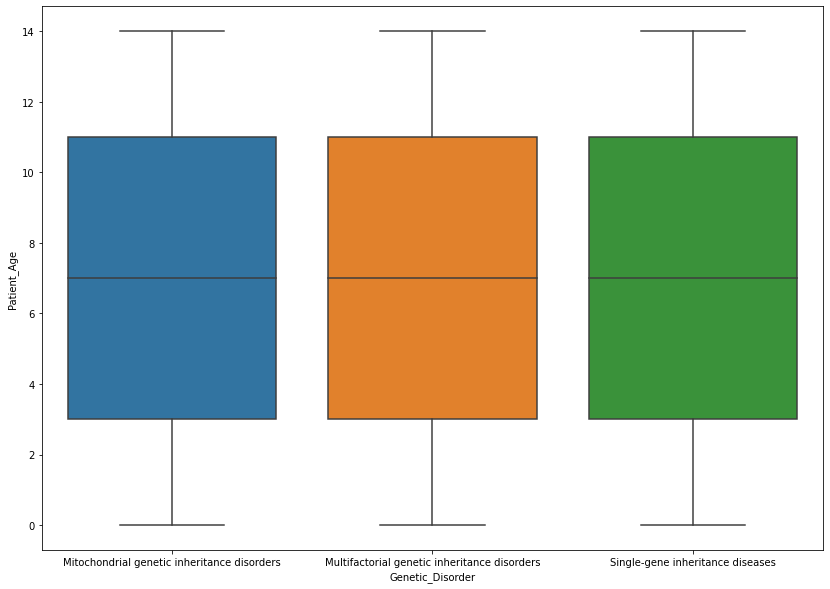

In [20]:
plt.figure(figsize=(14, 10))
sns.boxplot(x='Genetic_Disorder', y='Patient_Age', data=df)

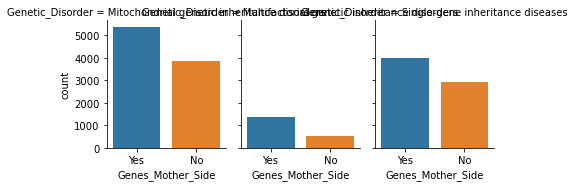

In [21]:
#cat vs cat 
#use bar chart

#titanic = sns.load_dataset("titanic")
sns.catplot(x="Genes_Mother_Side", col="Genetic_Disorder", col_wrap=4,
                data=df,
                kind="count", height=2.5, aspect=.8)

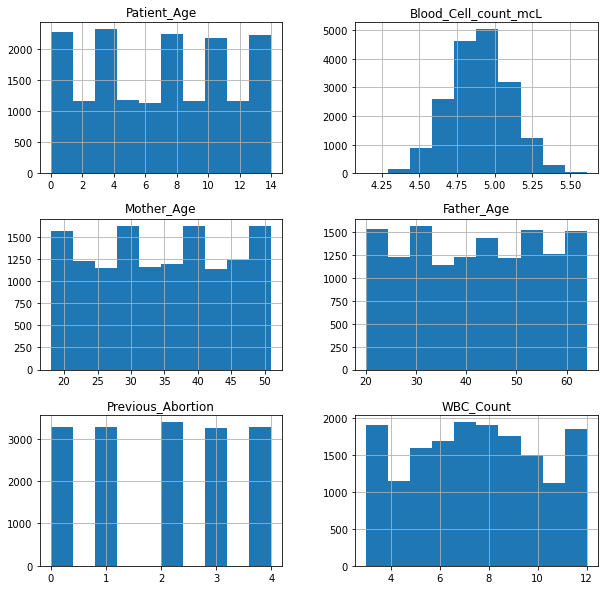

In [22]:
#histograms for each variable in df
hist = df.hist(bins=10,figsize =(10,10))


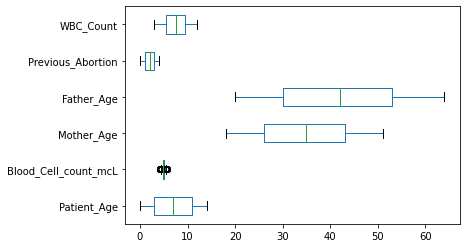

In [23]:
#create a boxplot for every column in df
boxplot = df.boxplot(grid=False, vert=False,fontsize=10)

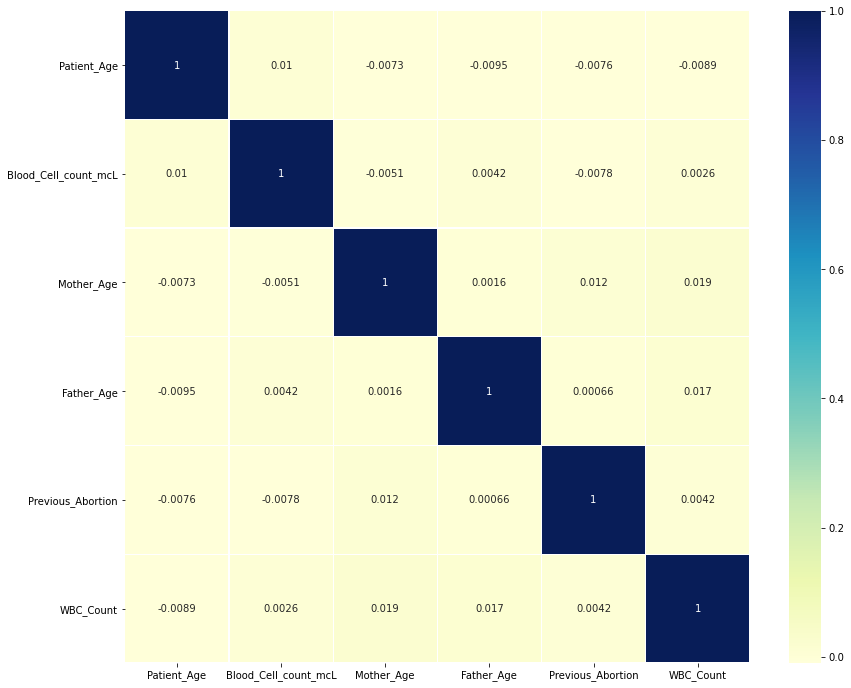

In [24]:
#create the correlation matrix heat map
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18047 entries, 0 to 22082
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Patient_Age                             16987 non-null  float64
 1   Genes_Mother_Side                       18047 non-null  object 
 2   Inherited_Father                        17827 non-null  object 
 3   Maternal_Gene                           15976 non-null  object 
 4   Paternal_Gene                           18047 non-null  object 
 5   Blood_Cell_count_mcL                    18047 non-null  float64
 6   Mother_Age                              13590 non-null  float64
 7   Father_Age                              13629 non-null  float64
 8   Status                                  18047 non-null  object 
 9   Respiratory_Rate_Breaths_Min            16477 non-null  object 
 10  Heart_Rates_Min                         16519 non-null  ob

In [26]:
# visualizing categorical data
#select categorical variables only
df_cat = df.select_dtypes(include = 'object').copy()
for c in df_cat.columns:
    print (df_cat[c].value_counts())
    print('----------------------------------')

Yes    10743
No      7304
Name: Genes_Mother_Side, dtype: int64
----------------------------------
No     10773
Yes     7054
Name: Inherited_Father, dtype: int64
----------------------------------
Yes    8803
No     7173
Name: Maternal_Gene, dtype: int64
----------------------------------
No     10239
Yes     7808
Name: Paternal_Gene, dtype: int64
----------------------------------
Alive       9061
Deceased    8986
Name: Status, dtype: int64
----------------------------------
Normal (30-60)    8281
Tachypnea         8196
Name: Respiratory_Rate_Breaths_Min, dtype: int64
----------------------------------
Normal         8396
Tachycardia    8123
Name: Heart_Rates_Min, dtype: int64
----------------------------------
Yes    16468
Name: Parental_Consent, dtype: int64
----------------------------------
Low     8322
High    8150
Name: Follow_Up, dtype: int64
----------------------------------
Male         5519
Ambiguous    5509
Female       5446
Name: Gender, dtype: int64
---------------------

<AxesSubplot:xlabel='Genes_Mother_Side', ylabel='count'>

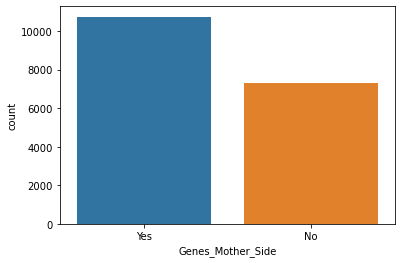

In [27]:
#count plot for one variable
#print(df_cat.columns)
sns.countplot(data = df_cat, x = df_cat['Genes_Mother_Side'])

<AxesSubplot:xlabel='Genetic_Disorder', ylabel='Patient_Age'>

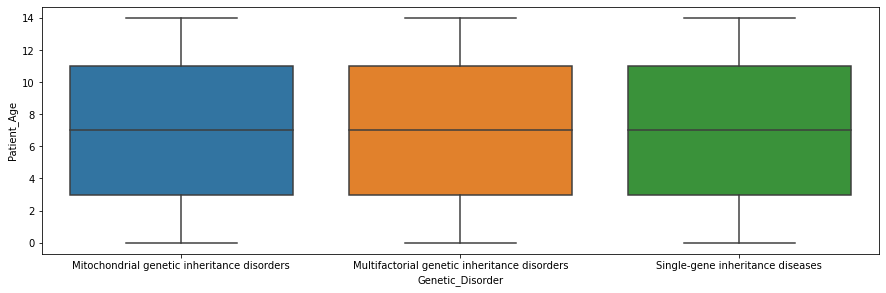

In [28]:
#fig, ax = plt.subplots()
#sns.catplot("Patient_Age", hue="Genetic_Disorder", data=df, kind="count", 
#            palette={1:"yellow", 2:"orange", 3:"red"}, ax=ax)

#plt.close(2) # catplot creates an extra figure we don't need

#ax.legend(title="Patient_Age")
#ax.set_xticklabels(["Mitochondrial genetic inheritance disorders","Single-gene inheritance diseases", "Multifactorial genetic inheritance disorders"])
#ax.set_xlabel("")

#fig.suptitle("Patient_Age vs. Genetic_Disorder");

#df.plot(kind="line", x="Genetic_Disorder", y="Patient_Age")

fig = plt.figure(figsize = (15,10))

#ax1 = fig.add_subplot(2,1,1) 
#sns.countplot(data = df, x = 'Genetic_Disorder', ax = ax1)

ax2 = fig.add_subplot(2,1,2) 
sns.boxplot(data = df, x='Genetic_Disorder', y='Patient_Age' , ax = ax2)

In [29]:
# Call the .corr() method on the wine dataset 
df.corr()

,Patient_Age,Blood_Cell_count_mcL,Mother_Age,Father_Age,Previous_Abortion,WBC_Count
Patient_Age,1.000000,0.010087,-0.007269,-0.009470,-0.007578,-0.008928
Blood_Cell_count_mcL,0.010087,1.000000,-0.005088,0.004155,-0.007769,0.002575
Mother_Age,-0.007269,-0.005088,1.000000,0.001614,0.011935,0.018558
Father_Age,-0.009470,0.004155,0.001614,1.000000,0.000662,0.017236
Previous_Abortion,-0.007578,-0.007769,0.011935,0.000662,1.000000,0.004174
WBC_Count,-0.008928,0.002575,0.018558,0.017236,0.004174,1.000000


In [30]:
#df["Genetic_Disorder"] = df["Genetic_Disorder"].replace(to_replace = 'Mitochondrial genetic inheritance disorders', value='1')
#df["Genetic_Disorder"] = df["Genetic_Disorder"].replace(to_replace = 'Single-gene inheritance diseases', value='2')
#df["Genetic_Disorder"] = df["Genetic_Disorder"].replace(to_replace = 'Multifactorial genetic inheritance disorders', value='3')
#df["Genetic_Disorder"] = df["Genetic_Disorder"].astype(int)

In [31]:
#df["Genetic_Disorder"].unique()

In [32]:
#df["Disorder_Subclass"] = df["Disorder_Subclass"].replace(to_replace = 'Leigh syndrome', value='1')
#df["Disorder_Subclass"] = df["Disorder_Subclass"].replace(to_replace = 'Mitochondrial myopathy', value='2')
#df["Disorder_Subclass"] = df["Disorder_Subclass"].replace(to_replace = 'Cystic fibrosis', value='3')
#df["Disorder_Subclass"] = df["Disorder_Subclass"].replace(to_replace = 'Tay-Sachs', value='4')
#df["Disorder_Subclass"] = df["Disorder_Subclass"].replace(to_replace = 'Diabetes', value='5')
#df["Disorder_Subclass"] = df["Disorder_Subclass"].replace(to_replace = 'Hemochromatosis', value='6')
#df["Disorder_Subclass"] = df["Disorder_Subclass"].replace(to_replace = "Leber's hereditary optic neuropathy", value='7')
#df["Disorder_Subclass"] = df["Disorder_Subclass"].replace(to_replace = "Alzheimer's", value='8')
#df["Disorder_Subclass"] = df["Disorder_Subclass"].replace(to_replace = 'Cancer', value='9')
#df["Disorder_Subclass"] = df["Disorder_Subclass"].astype(int)

In [33]:
#df["Disorder_Subclass"].unique()

In [34]:
#df["Genetic_Disorder"].isna().sum()

In [35]:
df_dup = df.duplicated()

In [36]:
print(df_dup.sum())

0


In [37]:
 df_cat.columns

Index(['Genes_Mother_Side', 'Inherited_Father', 'Maternal_Gene',
       'Paternal_Gene', 'Status', 'Respiratory_Rate_Breaths_Min',
       'Heart_Rates_Min', 'Parental_Consent', 'Follow_Up', 'Gender',
       'Birth_Asphyxia', 'Autopsy_Birth_Defect', 'Birth_Place', 'Folic_Acid',
       'Maternal_Illness', 'Radiation_Exposure', 'Substance_Abuse',
       'Assisted_Conception', 'Anomalies_History_Previous_Pregnancies',
       'Birth_Defects', 'Blood_Test_Result', 'Genetic_Disorder',
       'Disorder_Subclass'],
      dtype='object')

In [40]:
#PK notes:
#One-Hot-Encoding is used to create dummy variables to replace the categories in a categorical variable 
#into features of each category and represent it using 1 or 0 based on the presence or absence of the categorical 
#value in the record.
# This is required to do since the machine learning algorithms only work on the numerical data. 
#That is why there is a need to convert the categorical column into a numerical one.
#get_dummies is the method that creates a dummy variable for each categorical variable.

# Dummy coding is a way of incorporating nominal variables into regression analysis, 
# and the reason why is pretty intuitive once you understand the regression model. 
# Regressions are most commonly known for their use in using continuous variables (for instance, hours spent studying) time corresponds with increased GPAs.

# Since this is classification problem , we do not need to do this

#dummies = pd.get_dummies(df_cat, columns= df_cat.columns, prefix =df_cat.columns, drop_first = True).head() 
#dummies.head()
#dummies.columns
#columns = df_cat.columns
#df3 = pd.concat([df, dummies], axis=1)
#df3.drop(columns, axis=1, inplace=True)
#df3.head()
#df_cat.columns

#clarification from dipanjan
#dummies can be used for any kind 


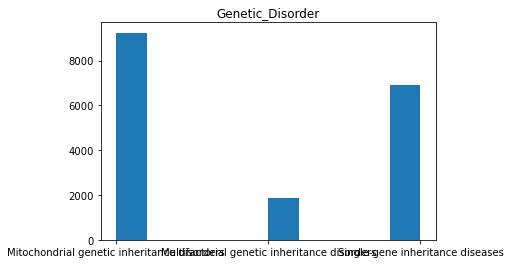

In [41]:
plt.hist(df['Genetic_Disorder'])
plt.title('Genetic_Disorder')
plt.show()

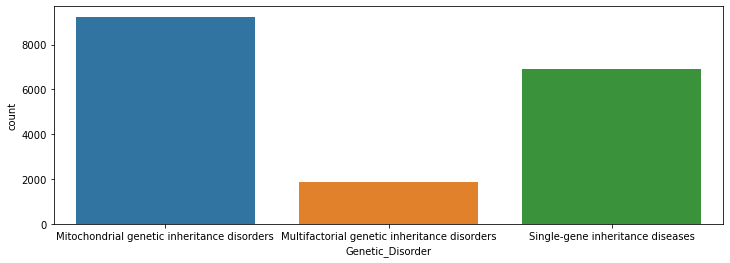

In [42]:
plt.figure(figsize=(12, 4))
sns.countplot(x = 'Genetic_Disorder', data = df);

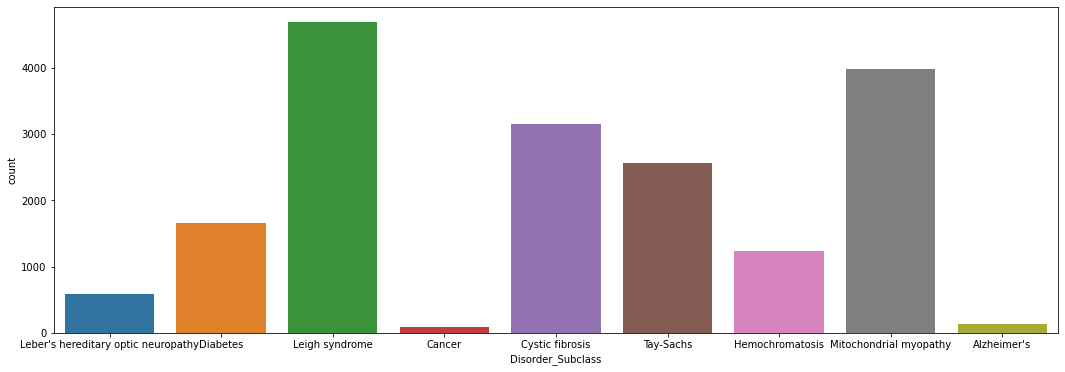

In [43]:
plt.figure(figsize=(18, 6))
sns.countplot(x = 'Disorder_Subclass', data = df);

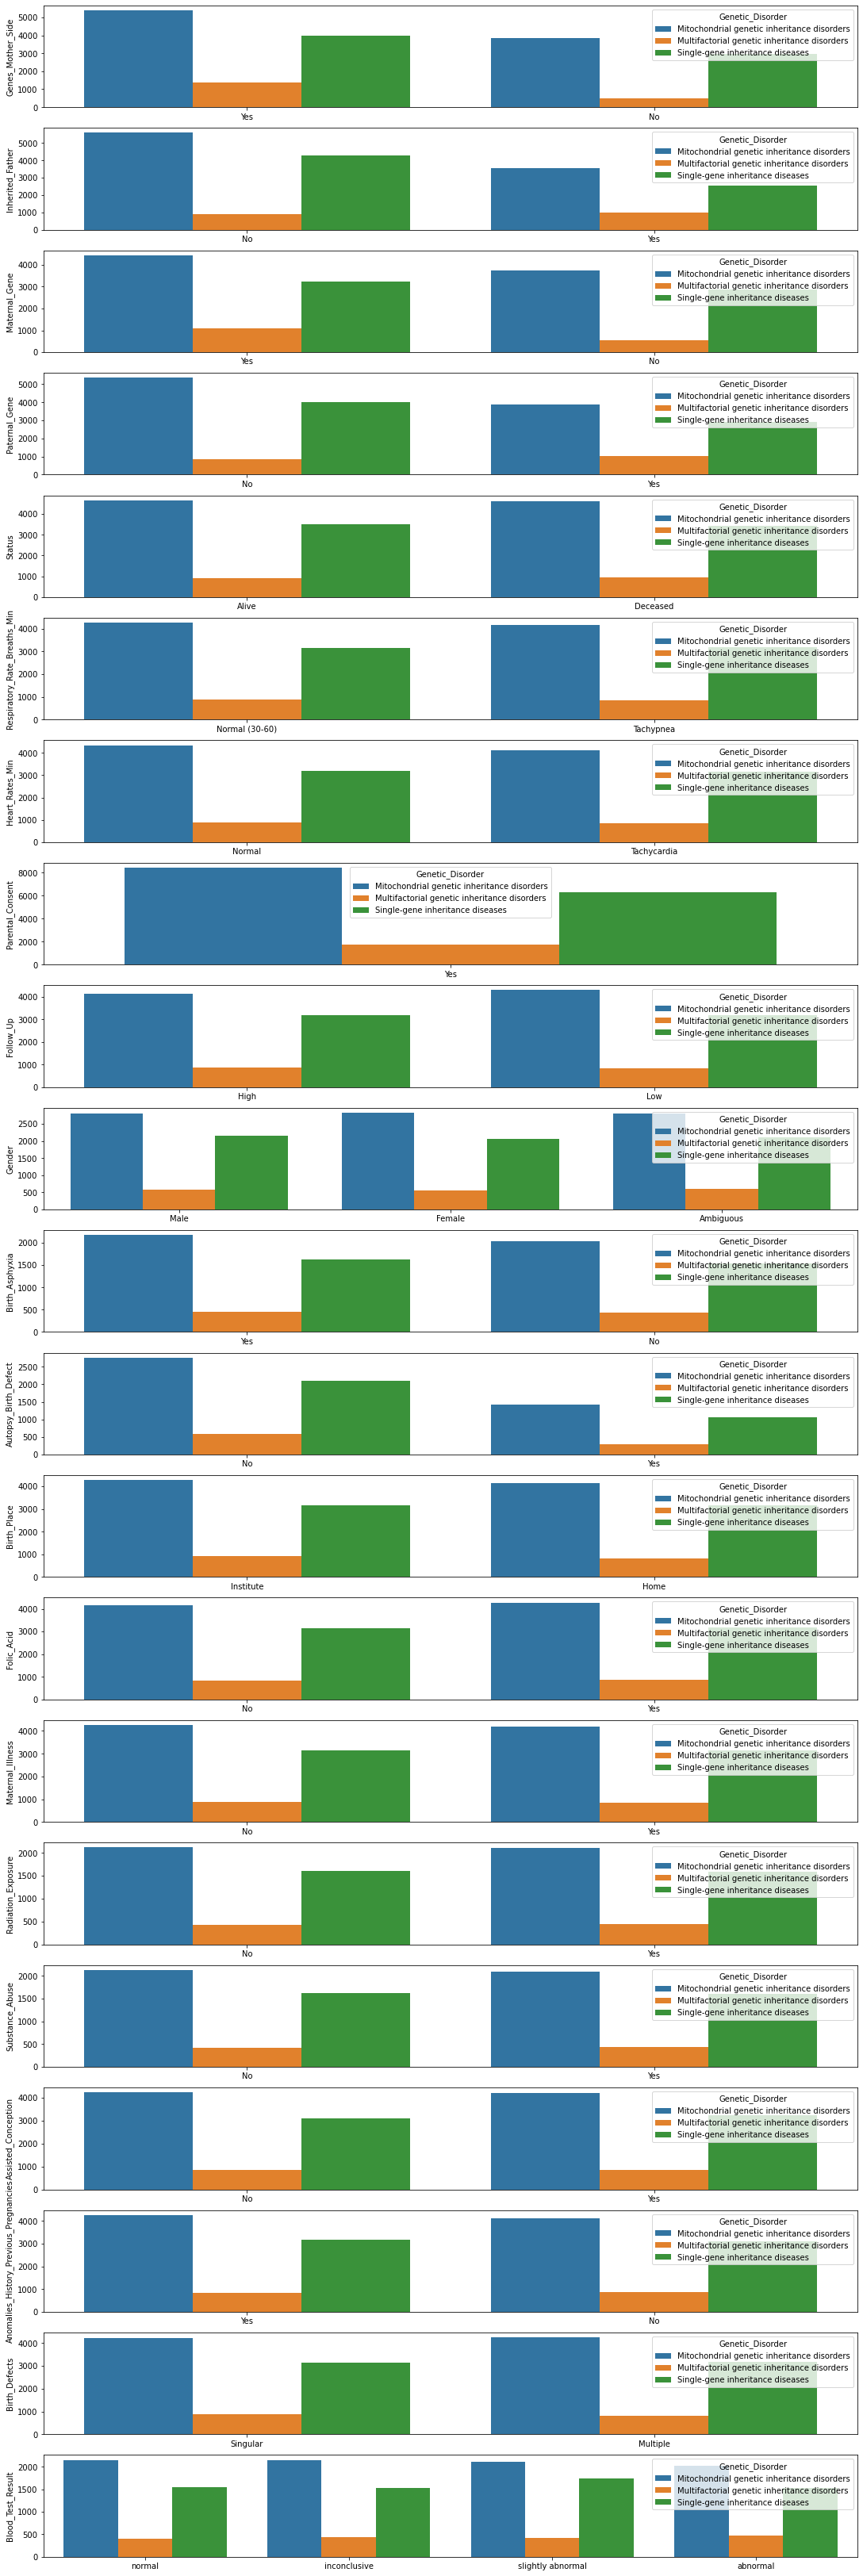

In [44]:
cat_cols=['Genes_Mother_Side', 'Inherited_Father', 'Maternal_Gene',
       'Paternal_Gene', 'Status', 'Respiratory_Rate_Breaths_Min',
       'Heart_Rates_Min', 'Parental_Consent', 'Follow_Up', 'Gender',
       'Birth_Asphyxia', 'Autopsy_Birth_Defect', 'Birth_Place', 'Folic_Acid',
       'Maternal_Illness', 'Radiation_Exposure', 'Substance_Abuse',
       'Assisted_Conception', 'Anomalies_History_Previous_Pregnancies',
       'Birth_Defects', 'Blood_Test_Result']

fig, ax = plt.subplots(len(cat_cols),  figsize = (15, 45), constrained_layout = True)

for i, var in enumerate(cat_cols): 
    sns.countplot(data = df, x = var, hue = 'Genetic_Disorder', ax = ax[i], linewidth = 1.5)
    ax[i].set_ylabel(var)
    ax[i].set_xlabel(None)

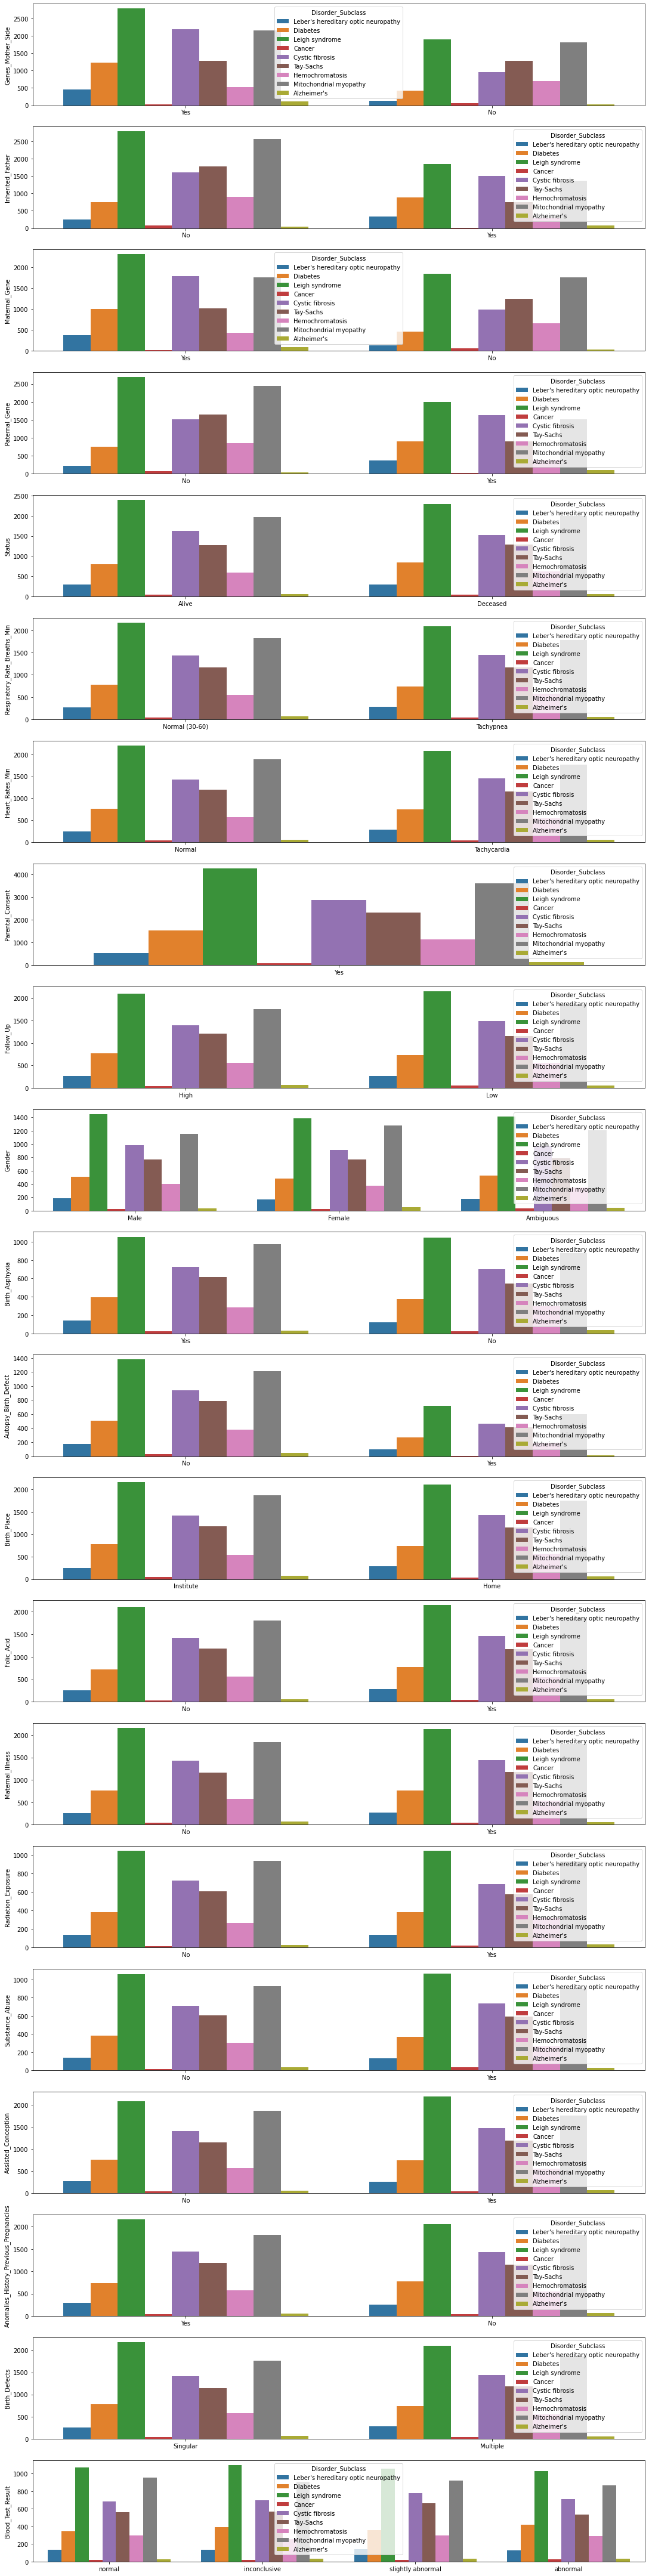

In [45]:
cat_cols=['Genes_Mother_Side', 'Inherited_Father', 'Maternal_Gene',
       'Paternal_Gene', 'Status', 'Respiratory_Rate_Breaths_Min',
       'Heart_Rates_Min', 'Parental_Consent', 'Follow_Up', 'Gender',
       'Birth_Asphyxia', 'Autopsy_Birth_Defect', 'Birth_Place', 'Folic_Acid',
       'Maternal_Illness', 'Radiation_Exposure', 'Substance_Abuse',
       'Assisted_Conception', 'Anomalies_History_Previous_Pregnancies',
       'Birth_Defects', 'Blood_Test_Result']

fig, ax = plt.subplots(len(cat_cols),  figsize = (15, 60), constrained_layout = True)

for i, var in enumerate(cat_cols): 
    sns.countplot(data = df, x = var, hue = 'Disorder_Subclass', ax = ax[i], linewidth = 1.5)
    ax[i].set_ylabel(var)
    ax[i].set_xlabel(None)

In [46]:
cat_cols=['Genes_Mother_Side', 'Inherited_Father', 'Maternal_Gene',
       'Paternal_Gene', 'Status', 'Respiratory_Rate_Breaths_Min',
       'Heart_Rates_Min', 'Parental_Consent', 'Follow_Up', 'Gender',
       'Birth_Asphyxia', 'Autopsy_Birth_Defect', 'Birth_Place', 'Folic_Acid',
       'Maternal_Illness', 'Radiation_Exposure', 'Substance_Abuse',
       'Assisted_Conception', 'Anomalies_History_Previous_Pregnancies',
       'Birth_Defects', 'Blood_Test_Result']

df["Genes_Mother_Side"].fillna(str(df["Genes_Mother_Side"].mode()[0]),inplace=True)
df["Inherited_Father"].fillna(str(df["Inherited_Father"].mode()[0]),inplace=True)
df["Maternal_Gene"].fillna(str(df["Maternal_Gene"].mode()[0]),inplace=True)
df["Paternal_Gene"].fillna(str(df["Paternal_Gene"].mode()[0]),inplace=True)
df["Status"].fillna(str(df["Status"].mode()[0]),inplace=True)
df["Respiratory_Rate_Breaths_Min"].fillna(str(df["Respiratory_Rate_Breaths_Min"].mode()[0]),inplace=True)
df["Heart_Rates_Min"].fillna(str(df["Parental_Consent"].mode()[0]),inplace=True)
df["Parental_Consent"].fillna(str(df["Genes_Mother_Side"].mode()[0]),inplace=True)
df["Follow_Up"].fillna(str(df["Follow_Up"].mode()[0]),inplace=True)
df["Gender"].fillna(str(df["Gender"].mode()[0]),inplace=True)
df["Birth_Asphyxia"].fillna(str(df["Birth_Asphyxia"].mode()[0]),inplace=True)
df["Autopsy_Birth_Defect"].fillna(str(df["Autopsy_Birth_Defect"].mode()[0]),inplace=True)
df["Birth_Place"].fillna(str(df["Birth_Place"].mode()[0]),inplace=True)
df["Folic_Acid"].fillna(str(df["Folic_Acid"].mode()[0]),inplace=True)
df["Maternal_Illness"].fillna(str(df["Maternal_Illness"].mode()[0]),inplace=True)
df["Radiation_Exposure"].fillna(str(df["Radiation_Exposure"].mode()[0]),inplace=True)
df["Substance_Abuse"].fillna(str(df["Substance_Abuse"].mode()[0]),inplace=True)
df["Assisted_Conception"].fillna(str(df["Assisted_Conception"].mode()[0]),inplace=True)
df["Anomalies_History_Previous_Pregnancies"].fillna(str(df["Anomalies_History_Previous_Pregnancies"].mode()[0]),inplace=True)
df["Birth_Defects"].fillna(str(df["Birth_Defects"].mode()[0]),inplace=True)
df["Blood_Test_Result"].fillna(str(df["Blood_Test_Result"].mode()[0]),inplace=True)

In [47]:
df.isna().sum()

Patient_Age                               1060
Genes_Mother_Side                            0
Inherited_Father                             0
Maternal_Gene                                0
Paternal_Gene                                0
Blood_Cell_count_mcL                         0
Mother_Age                                4457
Father_Age                                4418
Status                                       0
Respiratory_Rate_Breaths_Min                 0
Heart_Rates_Min                              0
Parental_Consent                             0
Follow_Up                                    0
Gender                                       0
Birth_Asphyxia                               0
Autopsy_Birth_Defect                         0
Birth_Place                                  0
Folic_Acid                                   0
Maternal_Illness                             0
Radiation_Exposure                           0
Substance_Abuse                              0
Assisted_Conc

In [48]:
#Finding the mean of the column having NaN
mean1=df['Patient_Age'].mean()
df['Patient_Age'].fillna(value=mean1, inplace=True)